In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# statistical info
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#check for null values
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

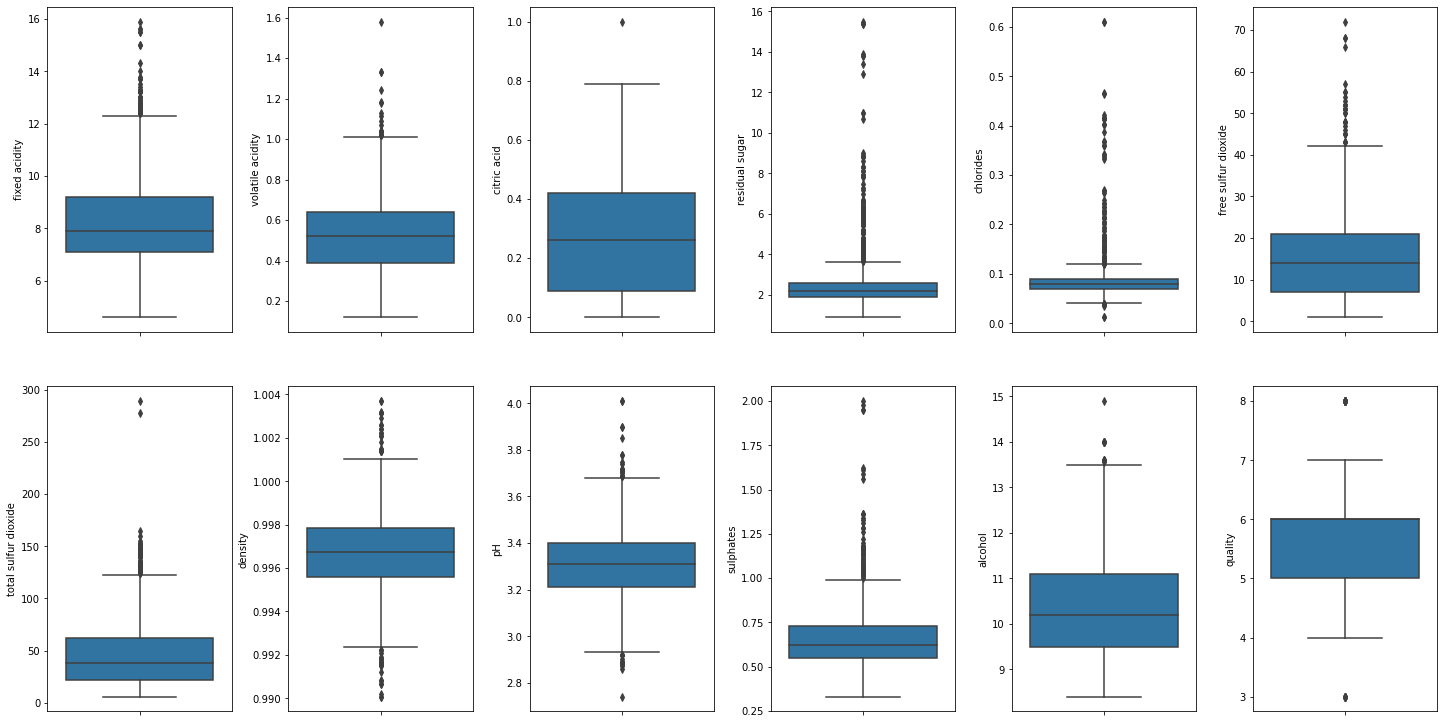

In [6]:
#create box plots
fig,ax= plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index =0
ax= ax.flatten()

for col,value in df.items():
    if col !='type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index +=1
        plt.tight_layout(pad=0.5,w_pad=0.7 , h_pad=5.0)


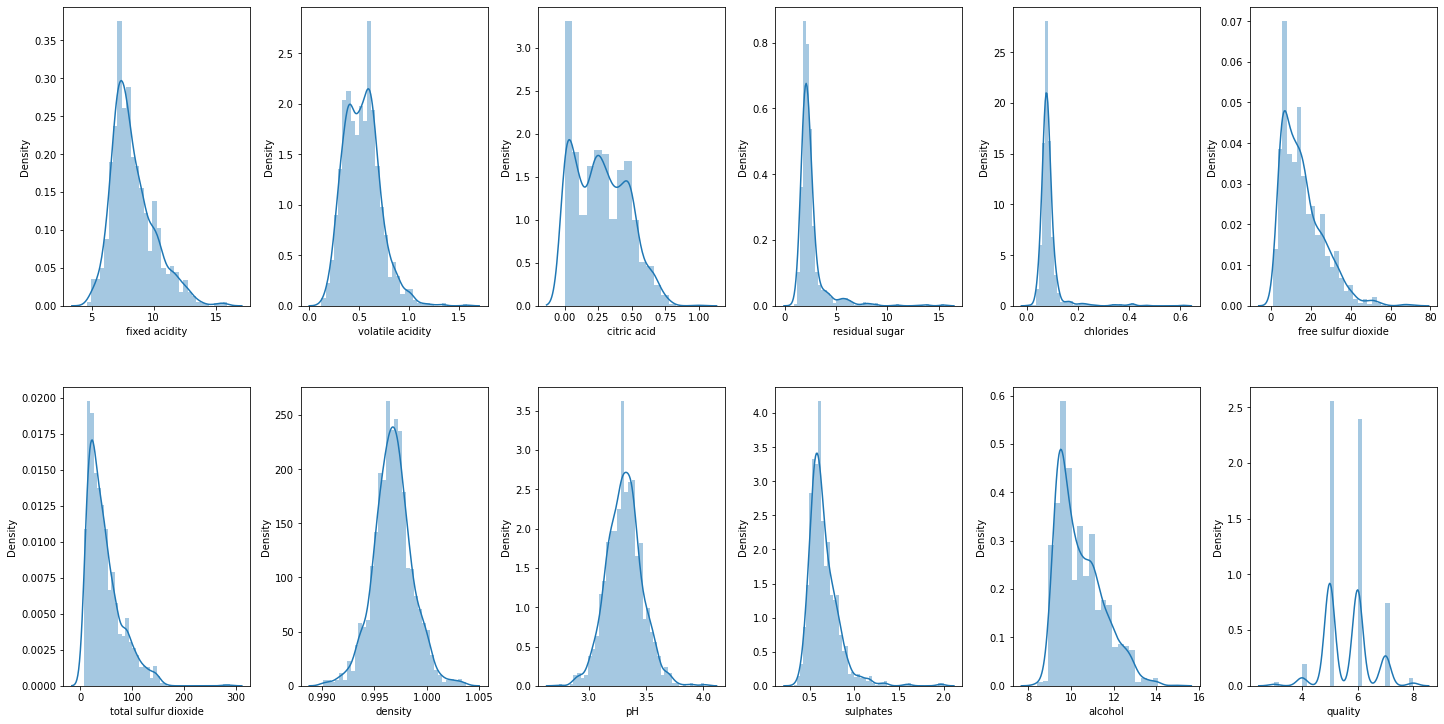

In [7]:
# create distribution plot
fig,ax= plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index =0
ax= ax.flatten()

for col,value in df.items():
    if col !='type':
        sns.distplot(value,ax=ax[index])
        index +=1
        plt.tight_layout(pad=0.5,w_pad=0.7 , h_pad=5.0)


In [8]:
#log transformation
df['free sulfur dioxide']= np.log(1+ df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

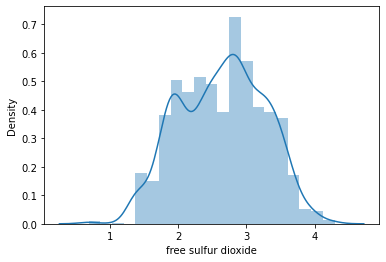

In [9]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='count'>

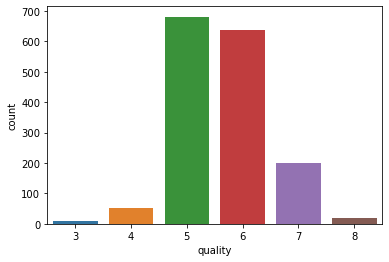

In [10]:
sns.countplot(df['quality'])

# corelation matrix

<AxesSubplot:>

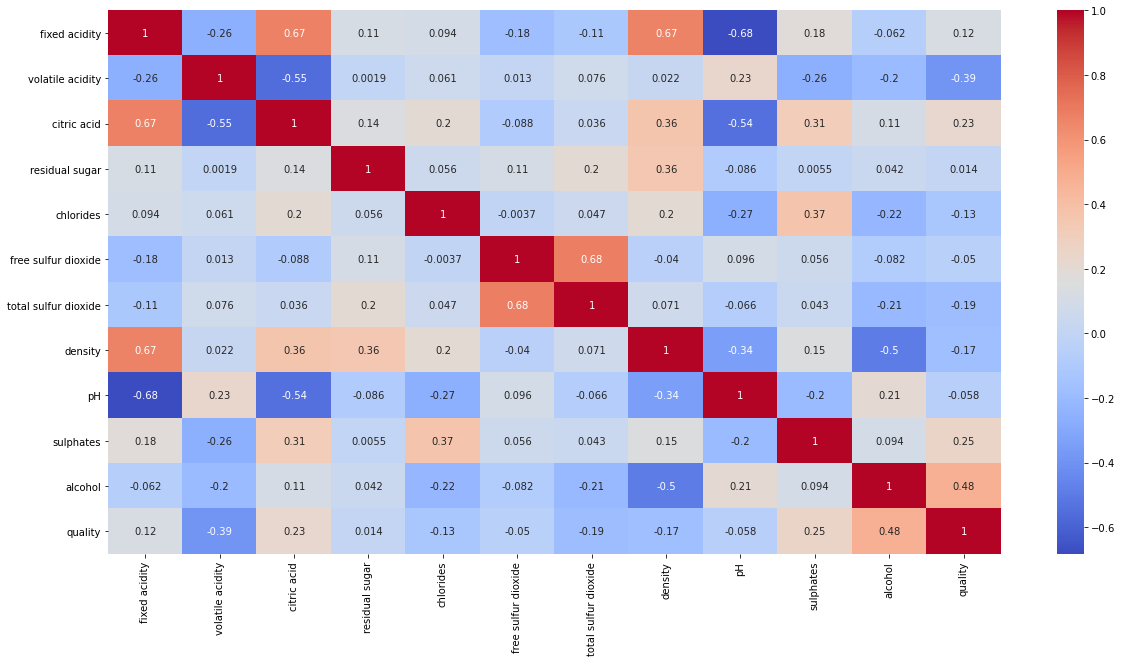

In [11]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True,cmap='coolwarm')

# input split

In [12]:
y= df['quality'].apply( lambda y_value:1 if y_value>=7 else 0)

In [13]:
print (y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [14]:
x=df.drop(columns=['quality'])



# class imbalancement

In [15]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

# MODEL TRAINING

In [16]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, x , y ):
    x_train, x_test, y_train , y_test = train_test_split(x , y ,test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train,y_train)
    print ("Accuracy:",model.score(x_test,y_test)* 100)
    
# cross- validation
    score =cross_val_score(model,x,y,cv=5)
    print ("CV score:", np.mean(score)*100)
     

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy: 88.0
CV score: 87.11716300940438


In [18]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model,x,y)


Accuracy: 89.25
CV score: 79.67378526645767


In [19]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify (model,x,y)


Accuracy: 90.25
CV score: 86.99255485893417


In [20]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
classify(model,x,y)


Accuracy: 91.5
CV score: 86.55525078369905


In [25]:
input_data =(8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5)
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the data as we are predicting for 1 value
input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print (prediction)

if (prediction[0]==1):
    print ("Good quality wine")
else:
    print ("Bad quality wine")


[1]
Good quality wine
